In [1]:
from moabb.contexts.ssvep import ExtentedSSVEP
from pyriemann.estimation import Covariances
from pyriemann.spatialfilters import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pyriemann.classification import TSclassifier, MDM
from sklearn.pipeline import make_pipeline
from collections import OrderedDict
from moabb.datasets.lisv_ssvep import lisvSSVEP
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(sns.plotting_context("talk"), 
        palette=sns.color_palette('Blues', n_colors=4),
        style=sns.axes_style("ticks"))

In [10]:
datasets = [lisvSSVEP()]
pipelines = OrderedDict()
pipelines['MDM'] = make_pipeline(Covariances('shaf'), MDM())
pipelines['TS'] = make_pipeline(Covariances('shaf'), TSclassifier())
pipelines['CSP+LDA'] = make_pipeline(Covariances('shaf'), CSP(12), LDA())
context = ExtentedSSVEP(datasets=datasets, pipelines=pipelines, frequencies=[13.0, 17.0, 21.0])

In [11]:
results = context.evaluate(verbose=True)

32 matching events found
32 matching events found
64 matching events found
[0.734375, 'lisv exoskeleton ssvep', 1, 'MDM', 0.24169397354125977]
[0.609375, 'lisv exoskeleton ssvep', 1, 'TS', 0.21030306816101074]
[0.546875, 'lisv exoskeleton ssvep', 1, 'CSP+LDA', 1.0993320941925049]
32 matching events found
32 matching events found
64 matching events found
[0.796875, 'lisv exoskeleton ssvep', 2, 'MDM', 0.2707481384277344]
[0.765625, 'lisv exoskeleton ssvep', 2, 'TS', 0.24738001823425293]
[0.6875, 'lisv exoskeleton ssvep', 2, 'CSP+LDA', 0.877269983291626]
32 matching events found
32 matching events found
64 matching events found
[0.859375, 'lisv exoskeleton ssvep', 3, 'MDM', 0.23851490020751953]
[0.9375, 'lisv exoskeleton ssvep', 3, 'TS', 0.23169589042663574]
[0.65625, 'lisv exoskeleton ssvep', 3, 'CSP+LDA', 1.054089069366455]
32 matching events found
32 matching events found
64 matching events found
[0.875, 'lisv exoskeleton ssvep', 4, 'MDM', 0.2574789524078369]
[0.84375, 'lisv exoskeleto

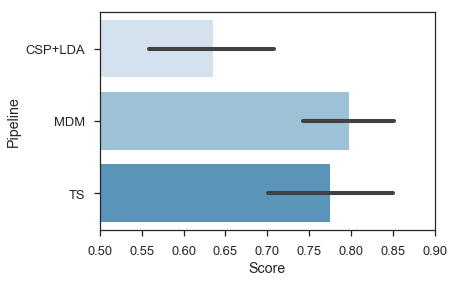

In [12]:
results_pd = pd.concat(results, ignore_index=True)
sns.barplot(y='Pipeline', x='Score', data=results_pd)
plt.xlim(0.5, 0.9);

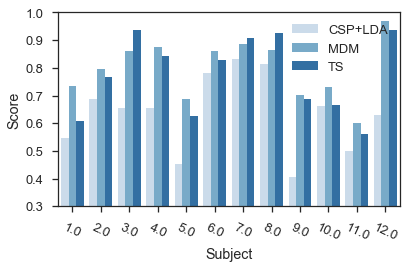

In [24]:
g = sns.barplot(x='Subject', y='Score', data=results_pd, hue='Pipeline', palette=sns.color_palette('Blues', 3))
g.set_ylim(0.3,1)
plt.xticks(rotation=-25)
plt.legend(loc='upper right')
plt.tight_layout()